In [1]:
import pandas as pd
import ast

# Lendo arquivos com resultados de caminhos mínimos (caminho e distâncias) - (Dijkstra)

dijkstra_path = pd.read_csv('D:\\repos\\study\\mestrado\\artigos\\UBS\\resultados\\dijkstra_path.csv', sep=';', index_col=0)
dijkstra_length = pd.read_csv('D:\\repos\\study\\mestrado\\artigos\\UBS\\resultados\\dijkstra_length.csv', sep=';', index_col=0, decimal=',')
print(dijkstra_path.head())
print(dijkstra_length.head())

   origem  destino                             caminho
0    3804     3804                            ['3804']
1    3804     3772  ['3804', '26150', '45004', '3772']
2    3804     4310           ['3804', '44135', '4310']
3    3804     5558           ['3804', '26150', '5558']
4    3804     5715  ['3804', '44135', '15969', '5715']
   origem  destino  distancia
0    3804     3804       0.00
1    3804    43790       2.28
2    3804    39752       2.68
3    3804    14398       3.69
4    3804    44135       4.26


In [2]:
# Juntando os DataFrames para trabalharmos com um só

dijkstra_length.set_index(['origem', 'destino'], inplace=True)
dijkstra_df = dijkstra_path.join(dijkstra_length, on=['origem', 'destino'])

# Adicionando campo ao DataFrame com quantidade de nós de cada caminho mínimo
lista_caminhos = []
for index, row in dijkstra_df.iterrows():
    lista_caminhos.append(len(ast.literal_eval(row['caminho'])))
df_qtd_nos_caminho = pd.DataFrame(lista_caminhos, columns=['qtd_nos_caminho'])
dijkstra_df = dijkstra_df.join(df_qtd_nos_caminho)
dijkstra_df.head()

,origem,destino,caminho,distancia,qtd_nos_caminho
0,3804,3804,['3804'],0.00,1
1,3804,3772,"['3804', '26150', '45004', '3772']",25.33,4
2,3804,4310,"['3804', '44135', '4310']",29.51,3
3,3804,5558,"['3804', '26150', '5558']",27.21,3
4,3804,5715,"['3804', '44135', '15969', '5715']",36.28,4


Com base em análises de outros conjuntos de dados foi visto que o bairro do Rio de Janeiro que sofre de maior "déficit" de UBS é a Barra da Tijuca, tendo apenas uma unidade. O que aconteceria se essa única unidade do bairro fosse fechada? Podemos analisar quais as unidades mais próximas para onde esses pacientes podem ser direcionados

In [3]:
# Importação do arquivos de dados e criação do grafo NetworkX

import networkx as nx

# Leitura de arquivo que contém as infos pra popular o grafo
file = 'D:\\repos\\study\\mestrado\\artigos\\UBS\\instancias\\grafo_cidade_rio.txt'
df_distancias = pd.DataFrame()
f = open(file, 'r')
count_lines = 0
for line in f:
    count_lines += 1
    if count_lines == 1:
        qtd_nos = int(line.split('\t')[0])
        qtd_arestas = int(line.split('\t')[1])
    else:
        if count_lines > (qtd_nos + 1):
            origem = line.split('\t')[0]
            destino = line.split('\t')[1]
            distancia = line.split('\t')[2]
            distancia = float(distancia.split('\n')[0])
            new_register = pd.DataFrame({'origem': origem,
                                         'destino': destino,
                                         'distancia': distancia},
                                        index=[0])
            df_distancias = df_distancias.append(new_register,
                                                 ignore_index=True)
df_distancias.reset_index(inplace=True)

# Criando grafo NetworkX
print('Iniciando criação do grafo')
grafo_ubs = nx.MultiDiGraph()
for index, row in df_distancias.iterrows():
    grafo_ubs.add_edge(row['origem'], row['destino'],
                       weight=row['distancia'])
print(nx.info(grafo_ubs))
print('O grafo tem pesos? ' + str(nx.is_weighted(grafo_ubs)))

Iniciando criação do grafo
Name: 
Type: MultiDiGraph
Number of nodes: 209
Number of edges: 43472
Average in degree: 208.0000
Average out degree: 208.0000
O grafo tem pesos? True


In [4]:
# O gid corresponde a UBS da Barra da Tijuca é o 50952
# Vamos analisar o caminho mínimo dele para as outras UBS para saber para onde direcionar os pacientes

ubs_barra_df = dijkstra_df[dijkstra_df['origem'] == 50952]
ubs_barra_df.sort_values(by=['distancia'], axis=0, inplace=True)
ubs_barra_df

c:\users\aiqui\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,origem,destino,caminho,distancia,qtd_nos_caminho
41591,50952,50952,['50952'],0.00,1
41791,50952,203,"['50952', '203']",7.35,2
41720,50952,44387,"['50952', '44387']",7.92,2
41780,50952,50973,"['50952', '50973']",8.82,2
41793,50952,781,"['50952', '781']",11.32,2
41610,50952,13323,"['50952', '13323']",11.71,2
41715,50952,43962,"['50952', '43962']",12.64,2
41787,50952,50547,"['50952', '50547']",14.01,2
41707,50952,42481,"['50952', '42481']",14.64,2
41628,50952,28747,"['50952', '28747']",14.68,2


Na tabela acima podemos ver que um paciente que frequentava a UBS da Barra da Tijuca possuí 3 opções a menos de 10 km de distância de sua antiga unidade. Essas unidades são nos seguintes bairros:

    203 - Gardênia Azul
    44387 - Jacarépagua
    50973 - Anil

A UBS da Barra atende uma população de 135.924 habitantes segundo o Censo de 2010. Se distribuíssemos igualmente esses habitantes entre esses 3 bairros adicionaríamos 45.308 habitantes em cada um. Os dados atuais deles são:

    Bairro	População	Qtd_UBS	Proporção
    ANIL	 24.172 	1	 24.172
    JACAREPAGUA	 157.326 	6	 26.221 
    GARDENIA AZUL	 17.715 	1	 17.715 

O Anil possui a 34o maior proporção de população/qtd de UBS. Jacarépagua é o 30o. Gardenia Azul é o 53o. Se esse bairros tivessem que comportar também os moradores da Barra da Tijuca as posições seriam:

    Anil - 3o
    Jacarépagua - 21o
    Gardenia Azul - 4o

Entre os bairros próximos Jacarépagua é o que possui maior quantidade de UBS (6), e, portanto, seria menos afetado pelo envio de pacientes oriundos do UBS da Barra que hipoteticamente foi fechado, sendo assim um forte candidato a receber esse contigente.

Agora vamos supor que se deseje saber a melhor forma (menor custo) para se percorrer todas as UBS da cidade do Rio de Janeiro. Isso pode servir, por exemplo, para determinar qual a forma mais eficiente de distribuir recursos que precisam ser entregues em todas as UBS (como vacinas e artigos de higíene). Para resolver esse problema, podemos utilizar o conceito de Árvore Geradora Mínima.

In [5]:
# Carregando arquivo que é um produto da execução da função minimum_spanning_tree do NetworkX

mst_df = pd.read_csv('D:\\repos\\study\\mestrado\\artigos\\UBS\\resultados\\mst.csv', sep=';', index_col=0, decimal=',')
mst_df

,de,para,distancia
0,3804,14398,3.69
1,3772,43965,2.45
2,3772,45004,1.14
3,4310,28649,3.04
4,4310,44971,5.29
5,5558,42480,2.35
6,5558,45004,3.00
7,5715,45267,2.27
8,6129,39764,6.13
9,6129,46243,6.61


In [6]:
# Distância total percorrida

round(mst_df['distancia'].sum(), 2)

1255.04

Como pudemos ver acima, para percorrer todas as UBS da cidade do Rio de maneira ótima, ou seja, percorrendo a menor distância, é necessário percorrer 1255,04 km.

In [7]:
mst_df['de'].value_counts()

13648    5
29672    5
35800    5
44843    4
45281    4
14398    4
50972    4
1988     4
39736    4
18192    3
9111     3
45993    3
28564    3
28560    3
35727    3
35601    3
39740    3
35603    3
902      3
48330    3
17079    3
39810    3
46758    3
43965    3
44915    3
9783     3
50976    3
44387    3
44836    3
50918    3
        ..
29670    1
29676    1
29680    1
42483    1
49994    1
35833    1
39765    1
39764    1
39754    1
39752    1
7326     1
45727    1
45748    1
44720    1
45273    1
3804     1
50917    1
12518    1
27886    1
33013    1
50952    1
44812    1
35613    1
50974    1
44842    1
39730    1
39731    1
39744    1
39747    1
45877    1
Name: de, Length: 209, dtype: int64

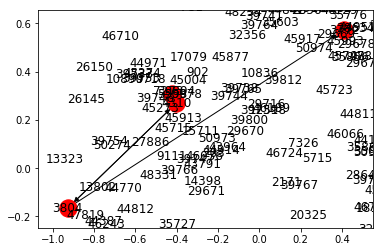

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

nx.draw_networkx(grafo_ubs, arrows=True, with_labels=True, nodelist=['3804', '3772', '4310', '5558'],
                 edgelist=[['3804', '3772'], ['3804', '4310'], ['4310', '3804']])
plt.show()

## Análise de UBS da cidade de São Paulo

Daqui em diante estão análises relacionadas a UBS da cidade de São Paulo. Seram feitas tanto análises relacionadas a centralidade quanto a sua distribuição entre os distritos.

É importante explicar que, diferente da cidade do Rio, a cidade de São Paulo possui uma divisão administrativa em subprefeituras e distritos, o que fez com que só encontrássemos dados de população por distrito. Os dados das UBS possuem divisão por bairro, mas foi possível relacionar a vários distritos paulistas, então acreditamos que os dados sejam equivalentes.

In [1]:
import pandas as pd
import ast

# Lendo arquivos com resultados de caminhos mínimos (caminho e distâncias) para a cidade de São Paulo - (Dijkstra)

dijkstra_path = pd.read_csv('D:\\repos\\study\\mestrado\\artigos\\UBS\\resultados\\dijkstra_path_saopaulo.csv', sep=';', index_col=0)
dijkstra_length = pd.read_csv('D:\\repos\\study\\mestrado\\artigos\\UBS\\resultados\\dijkstra_length_saopaulo.csv', sep=';', index_col=0, decimal='.')
print(dijkstra_path.head())
print(dijkstra_length.head())

   origem  destino                             caminho
0    3469     3469                            ['3469']
1    3469     3889  ['3469', '43133', '43148', '3889']
2    3469     3865   ['3469', '43013', '7015', '3865']
3    3469     3891   ['3469', '3961', '38065', '3891']
4    3469     3866                    ['3469', '3866']
   origem  destino  distancia
0    3469     3469       0.00
1    3469    46119       0.86
2    3469    44285       1.05
3    3469    46354       1.33
4    3469    28103       1.99


In [2]:
# Juntando os DataFrames para trabalharmos com um só

dijkstra_length.set_index(['origem', 'destino'], inplace=True)
dijkstra_df = dijkstra_path.join(dijkstra_length, on=['origem', 'destino'])

# Adicionando campo ao DataFrame com quantidade de nós de cada caminho mínimo
lista_caminhos = []
for index, row in dijkstra_df.iterrows():
    lista_caminhos.append(len(ast.literal_eval(row['caminho'])))
df_qtd_nos_caminho = pd.DataFrame(lista_caminhos, columns=['qtd_nos_caminho'])
dijkstra_df = dijkstra_df.join(df_qtd_nos_caminho)
dijkstra_df.head()

,origem,destino,caminho,distancia,qtd_nos_caminho
0,3469,3469,['3469'],0.00,1
1,3469,3889,"['3469', '43133', '43148', '3889']",42.08,4
2,3469,3865,"['3469', '43013', '7015', '3865']",41.99,4
3,3469,3891,"['3469', '3961', '38065', '3891']",39.91,4
4,3469,3866,"['3469', '3866']",34.81,2


Com base em análises de outros conjuntos de dados foi visto que o distrito de Sõa Paulo que sofre de maior "déficit" de UBS é a Jabaquara, tendo apenas uma unidade. O que aconteceria se essa única unidade do bairro fosse fechada? Podemos analisar quais as unidades mais próximas para onde esses pacientes podem ser direcionados.